In [1]:
%%capture
!pip install bertopic

In [2]:

!pip install flair

     |████████████████████████████████| 319 kB 5.1 MB/s 
     |████████████████████████████████| 19.7 MB 1.4 MB/s 
     |████████████████████████████████| 1.2 MB 36.2 MB/s 
     |████████████████████████████████| 788 kB 42.0 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 981 kB 50.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 62 kB 769 kB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=c48be355d877ec210d46e802d1610588e7bda2b5aef3609d9411045eac9349e8
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=60277cdb7d430d7c230fa5a1a689d6bddbb0604ba90f73291886886d2797b83b
  Stored in dir

In [2]:
import pandas as pd
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

data = pd.read_csv('/content/baseline_text_inputs.csv')
data

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,html_text
0,Like us on Facebook . PATIENT PORTAL LOGIN . O...
1,Donate . Share . GreatNonprofits . Over millio...
2,COVID Response . Access our . COVID Response h...
3,My Cart . Member Login . En Espaol . Join Now ...
4,Skip to Bottom . Skip to Chat Email Text . Sit...
...,...
1551,PORTFOLIO.EXPLORE RECENT WORK.GET A QUOTE TODA...
1552,Call Now To Book Your Adventure.CUSTOMER TESTI...
1553,Financial Planning.Investment Portfolio Manage...
1554,Patients.Current Projects.Certification Course...


In [3]:
#docs = list(data['html_text'].unique())

docs = data['html_text']
print(len(docs))

1556


In [4]:
import pandas as pd
from bertopic import BERTopic
from flair.embeddings import TransformerDocumentEmbeddings
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP

roberta = TransformerDocumentEmbeddings('roberta-base')
umap_model = UMAP(n_neighbors=15, n_components=6, min_dist=0.0, metric='cosine')


vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words="english")

# topic_model = BERTopic(embedding_model=roberta,umap_model=umap_model,vectorizer_model=vectorizer_model).fit(docs)

topic_model = BERTopic(language="english", calculate_probabilities=True,vectorizer_model=vectorizer_model, verbose=True,nr_topics=5 )
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/49 [00:00<?, ?it/s]

2021-09-27 09:24:48,155 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-09-27 09:25:11,267 - BERTopic - Reduced dimensionality with UMAP
2021-09-27 09:25:11,391 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-09-27 09:25:33,462 - BERTopic - Reduced number of topics from 7 to 6


In [5]:
all_topics = topic_model.get_topic_info().Topic
for topic in all_topics:
    print('topic_cluster: {}'.format(topic),topic_model.get_topic(topic=topic))


topic_cluster: 0 [('restaurants', 0.03012506621400744), ('insurance', 0.019570460692862866), ('business', 0.01719112571802785), ('pet', 0.01063895996236835), ('care', 0.009380453283158766), ('medical health care', 0.00929405026851148), ('medical health', 0.009292704564706083), ('health care', 0.008885529844497097), ('shops', 0.008575588857714955), ('salons', 0.007801231424009664)]
topic_cluster: 1 [('care', 0.010983014157905247), ('services', 0.009939470555654015), ('contact', 0.009466737515816613), ('service', 0.009125108605742189), ('email', 0.007357012910977071), ('credit', 0.0068607631161351134), ('account', 0.005809671300532497), ('incorporated', 0.005128452017466909), ('carecom', 0.004824470779362263), ('banking', 0.00466039973696655)]
topic_cluster: 2 [('medicare', 0.07571951142959295), ('practice location', 0.026036072918525627), ('providers', 0.01735570803174958), ('provider', 0.017268816218603857), ('clinics', 0.015894138828124633), ('medicare enrolled', 0.014899992181439227)

In [ ]:
topic_model.visualize_barchart()

In [ ]:
# Predicting the document 

topic_model.topics

{0: [('restaurants', 0.03167424578611328),
  ('insurance', 0.020434377254316807),
  ('business', 0.01793990395684129),
  ('pet', 0.011020100524591651),
  ('care', 0.009776490497418754),
  ('medical health care', 0.009621225115587276),
  ('medical health', 0.009619880676872788),
  ('health care', 0.009221990799507071),
  ('shops', 0.008857392964306422),
  ('salons', 0.008053827844370144)],
 1: [('care', 0.011662781983117385),
  ('services', 0.010467323907925742),
  ('contact', 0.009741611102024445),
  ('service', 0.009601677996251527),
  ('email', 0.007696314798728021),
  ('credit', 0.007127863141698744),
  ('account', 0.005869205731265255),
  ('carecom', 0.0050956911322832315),
  ('appointment', 0.004839626649908636),
  ('banking', 0.004826274672014651)],
 2: [('medicare', 0.07915030288600422),
  ('practice location', 0.026933169024871754),
  ('providers', 0.017762065842935337),
  ('provider', 0.017698820101312164),
  ('clinics', 0.016399141185965516),
  ('medicare enrolled', 0.0153862

In [ ]:
topic_dict = {-1:'hospitality',0:'healthcare_providers',1:'',2:'contact_info',3:'other_info',4:'sales_info',5:'flags',6:'address',7:'id',}


In [ ]:
topic_model.topic_names

{0: '0_restaurants_insurance_business_pet',
 1: '1_care_services_contact_service',
 2: '2_medicare_practice location_providers_provider',
 3: '3_shop_groupon_deals_jewelry',
 4: '4_food_hours_order_pizza'}

In [ ]:
# topics, prob = topic_model.fit_transform(docs) # get document level topics and thier probalities

In [ ]:
topic_dict = topic_model.topic_names

topic_labels = []

for topic_cluster in topics:
    topic_name =  topic_dict.get(topic_cluster)
    topic_labels.append(topic_name)


print('Total Topic Length: ', len(topic_labels))

Total Topic Length:  1556


In [ ]:
len(probs)

1556

In [ ]:
topic_labels.unique()

AttributeError: ignored

In [ ]:
topic_model.

array([[1.        , 0.30261297, 0.11670681, 0.15879147, 0.16478324],
       [0.30261297, 1.        , 0.18635327, 0.22561586, 0.21552499],
       [0.11670681, 0.18635327, 1.        , 0.04695021, 0.04510135],
       [0.15879147, 0.22561586, 0.04695021, 1.        , 0.12955782],
       [0.16478324, 0.21552499, 0.04510135, 0.12955782, 1.        ]])

In [ ]:
output_df =  pd.DataFrame({'text':docs,'cluster_name':topic_labels,'cluster':topics})
output_df

,text,cluster_name,cluster
0,Like us on Facebook . PATIENT PORTAL LOGIN . O...,1_care_services_contact_service,1
1,Donate . Share . GreatNonprofits . Over millio...,1_care_services_contact_service,1
2,COVID Response . Access our . COVID Response h...,1_care_services_contact_service,1
3,My Cart . Member Login . En Espaol . Join Now ...,1_care_services_contact_service,1
4,Skip to Bottom . Skip to Chat Email Text . Sit...,1_care_services_contact_service,1
...,...,...,...
1551,PORTFOLIO.EXPLORE RECENT WORK.GET A QUOTE TODA...,1_care_services_contact_service,1
1552,Call Now To Book Your Adventure.CUSTOMER TESTI...,1_care_services_contact_service,1
1553,Financial Planning.Investment Portfolio Manage...,1_care_services_contact_service,1
1554,Patients.Current Projects.Certification Course...,1_care_services_contact_service,1


In [ ]:
output_df.to_csv('baseline_topic_clusters.csv', index= False)

In [ ]:
base_line_df = pd.read_excel('/content/Q&A Validation_Master_09_20.xlsx')
base_line_df

,Q,Question,Company Name,url,html_text,found_noun,context,context_verb,confidence,Status,Unnamed: 10
0,Q1,"Does the insured/applicant process, transmit, ...",DC ASSOCIATES,http://procaremd.com/?page_id=15,Like us on Facebook . PATIENT PORTAL LOGIN . O...,['health information'],a referral . Patient Forms . Patient Registrat...,['record'],0.99,TP,there is a discrepency with the URL and the co...
1,Q1,"Does the insured/applicant process, transmit, ...",HEALTH EXCEL INCORPORATED,https://greatnonprofits.org/org/health-excel-f...,Donate . Share . GreatNonprofits . Over millio...,['health information'],education the dissemination of health care inf...,['use'],0.99,FP,NaN
2,Q1,"Does the insured/applicant process, transmit, ...",BAYLOR MEDICAL FOUNDATION,https://www.bcm.edu/healthcare/specialties/fam...,COVID Response . Access our . COVID Response h...,['health information'],Medical Home Recognition raises the bar in def...,['use'],0.99,FP,NaN
3,Q1,"Does the insured/applicant process, transmit, ...",BENCHMARK DENTAL PLANS,https://www.dentalplans.com/dentists/tx/austin...,My Cart . Member Login . En Espaol . Join Now ...,['health data'],Without Plan] is determined by DentalPlanscom ...,['use'],0.99,TP,NaN
4,Q1,"Does the insured/applicant process, transmit, ...",INDUSTRIAL PROCESS COMPONENTS INCORPORATED,https://www.phoenix.edu/campus-locations/tx/fo...,Skip to Bottom . Skip to Chat Email Text . Sit...,['health information'],. Marketing . Operations Management . Project ...,['record'],0.99,TP,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1496,Q5,"Does the insured/applicant manufacture, resell...",A AND J CUTTING INCORPORATED,https://www.yellowpages.com/los-angeles-ca/mip...,Browse . auto services . Auto Body Shops . Aut...,['printers'],. Sheet Metal Fabricators . Steel Processing ....,['repair'],0.94,FP,NaN
1497,Q5,"Does the insured/applicant manufacture, resell...",TOUCHDOWN FABRIC INCORPORATED,https://www.yellowpages.com/los-angeles-ca/mip...,Browse . auto services . Auto Body Shops . Aut...,['printers'],Metal Fabricators . Material Handling Equipmen...,['repair'],0.93,FP,NaN
1498,Q5,"Does the insured/applicant manufacture, resell...",ATM,https://locations.ecoatm.com/tx/corpus-christi...,GTMMWKPRFJ . Price Your Device . How it Works ...,['mobile phone'],communities and environments We want this to c...,['sell'],0.83,TP,NaN
1499,Q5,"Does the insured/applicant manufacture, resell...",UNITED COMPUTER SOLUTIONS INCORPORATED,https://oncallers.com/,Home Improvements . Property Management . Kitc...,['laptops'],iPhone Repairs . Samsung Repairs . Other Smart...,['repair'],0.95,TP,NaN


In [ ]:
base_line_docs = base_line_df['context']


In [ ]:
from tqdm import tqdm

topic_dict = topic_model.topic_names

topic_labels = []
topic_names = []
scores = []


# for topic_cluster in topics:
#     topic_name =  topic_dict.get(topic_cluster)
#     topic_labels.append(topic_name)


for doc in tqdm(base_line_docs):
    predictions = topic_model.find_topics(doc)
    topic_cluster = predictions[0][0]
    topic_name = topic_dict.get(topic_cluster)
    confidence_score = predictions[1][0]
    
    topic_labels.append(topic_cluster)
    topic_names.append(topic_name)
    scores.append(confidence_score)

100%|██████████| 1501/1501 [00:16<00:00, 89.32it/s]


In [ ]:
base_line_df['topic_name'] = topic_names
base_line_df['topic_cluster'] = topic_labels
base_line_df['confidence_score'] = scores



In [ ]:
base_line_df

,Q,Question,Company Name,url,html_text,found_noun,context,context_verb,confidence,Status,Unnamed: 10,topic_name,topic_cluster,confidence_score
0,Q1,"Does the insured/applicant process, transmit, ...",DC ASSOCIATES,http://procaremd.com/?page_id=15,Like us on Facebook . PATIENT PORTAL LOGIN . O...,['health information'],a referral . Patient Forms . Patient Registrat...,['record'],0.99,TP,there is a discrepency with the URL and the co...,2_medicare_practice location_providers_provider,2,0.459963
1,Q1,"Does the insured/applicant process, transmit, ...",HEALTH EXCEL INCORPORATED,https://greatnonprofits.org/org/health-excel-f...,Donate . Share . GreatNonprofits . Over millio...,['health information'],education the dissemination of health care inf...,['use'],0.99,FP,NaN,2_medicare_practice location_providers_provider,2,0.469682
2,Q1,"Does the insured/applicant process, transmit, ...",BAYLOR MEDICAL FOUNDATION,https://www.bcm.edu/healthcare/specialties/fam...,COVID Response . Access our . COVID Response h...,['health information'],Medical Home Recognition raises the bar in def...,['use'],0.99,FP,NaN,2_medicare_practice location_providers_provider,2,0.427151
3,Q1,"Does the insured/applicant process, transmit, ...",BENCHMARK DENTAL PLANS,https://www.dentalplans.com/dentists/tx/austin...,My Cart . Member Login . En Espaol . Join Now ...,['health data'],Without Plan] is determined by DentalPlanscom ...,['use'],0.99,TP,NaN,2_medicare_practice location_providers_provider,2,0.334991
4,Q1,"Does the insured/applicant process, transmit, ...",INDUSTRIAL PROCESS COMPONENTS INCORPORATED,https://www.phoenix.edu/campus-locations/tx/fo...,Skip to Bottom . Skip to Chat Email Text . Sit...,['health information'],. Marketing . Operations Management . Project ...,['record'],0.99,TP,NaN,0_restaurants_insurance_business_pet,0,0.392657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,Q5,"Does the insured/applicant manufacture, resell...",A AND J CUTTING INCORPORATED,https://www.yellowpages.com/los-angeles-ca/mip...,Browse . auto services . Auto Body Shops . Aut...,['printers'],. Sheet Metal Fabricators . Steel Processing ....,['repair'],0.94,FP,NaN,3_shop_groupon_deals_jewelry,3,0.256460
1497,Q5,"Does the insured/applicant manufacture, resell...",TOUCHDOWN FABRIC INCORPORATED,https://www.yellowpages.com/los-angeles-ca/mip...,Browse . auto services . Auto Body Shops . Aut...,['printers'],Metal Fabricators . Material Handling Equipmen...,['repair'],0.93,FP,NaN,3_shop_groupon_deals_jewelry,3,0.230606
1498,Q5,"Does the insured/applicant manufacture, resell...",ATM,https://locations.ecoatm.com/tx/corpus-christi...,GTMMWKPRFJ . Price Your Device . How it Works ...,['mobile phone'],communities and environments We want this to c...,['sell'],0.83,TP,NaN,0_restaurants_insurance_business_pet,0,0.307187
1499,Q5,"Does the insured/applicant manufacture, resell...",UNITED COMPUTER SOLUTIONS INCORPORATED,https://oncallers.com/,Home Improvements . Property Management . Kitc...,['laptops'],iPhone Repairs . Samsung Repairs . Other Smart...,['repair'],0.95,TP,NaN,0_restaurants_insurance_business_pet,0,0.222607


In [ ]:
base_line_df.to_csv('baseline_topic_clusters_all_v2.csv',index= False)

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_term_rank()


In [6]:
# save the topic mdoel

topic_model.save('chubb_baseline_topic_clusters_reduced_v2.bin')

In [ ]:
base_line_df.head()

,Q,Question,Company Name,url,html_text,found_noun,context,context_verb,confidence,Status,Unnamed: 10,topic_name,topic_cluster,confidence_score
0,Q1,"Does the insured/applicant process, transmit, ...",DC ASSOCIATES,http://procaremd.com/?page_id=15,Like us on Facebook . PATIENT PORTAL LOGIN . O...,['health information'],a referral . Patient Forms . Patient Registrat...,['record'],0.99,TP,there is a discrepency with the URL and the co...,2_medicare_practice location_providers_provider,2,0.459963
1,Q1,"Does the insured/applicant process, transmit, ...",HEALTH EXCEL INCORPORATED,https://greatnonprofits.org/org/health-excel-f...,Donate . Share . GreatNonprofits . Over millio...,['health information'],education the dissemination of health care inf...,['use'],0.99,FP,NaN,2_medicare_practice location_providers_provider,2,0.469682
2,Q1,"Does the insured/applicant process, transmit, ...",BAYLOR MEDICAL FOUNDATION,https://www.bcm.edu/healthcare/specialties/fam...,COVID Response . Access our . COVID Response h...,['health information'],Medical Home Recognition raises the bar in def...,['use'],0.99,FP,NaN,2_medicare_practice location_providers_provider,2,0.427151
3,Q1,"Does the insured/applicant process, transmit, ...",BENCHMARK DENTAL PLANS,https://www.dentalplans.com/dentists/tx/austin...,My Cart . Member Login . En Espaol . Join Now ...,['health data'],Without Plan] is determined by DentalPlanscom ...,['use'],0.99,TP,NaN,2_medicare_practice location_providers_provider,2,0.334991
4,Q1,"Does the insured/applicant process, transmit, ...",INDUSTRIAL PROCESS COMPONENTS INCORPORATED,https://www.phoenix.edu/campus-locations/tx/fo...,Skip to Bottom . Skip to Chat Email Text . Sit...,['health information'],. Marketing . Operations Management . Project ...,['record'],0.99,TP,NaN,0_restaurants_insurance_business_pet,0,0.392657


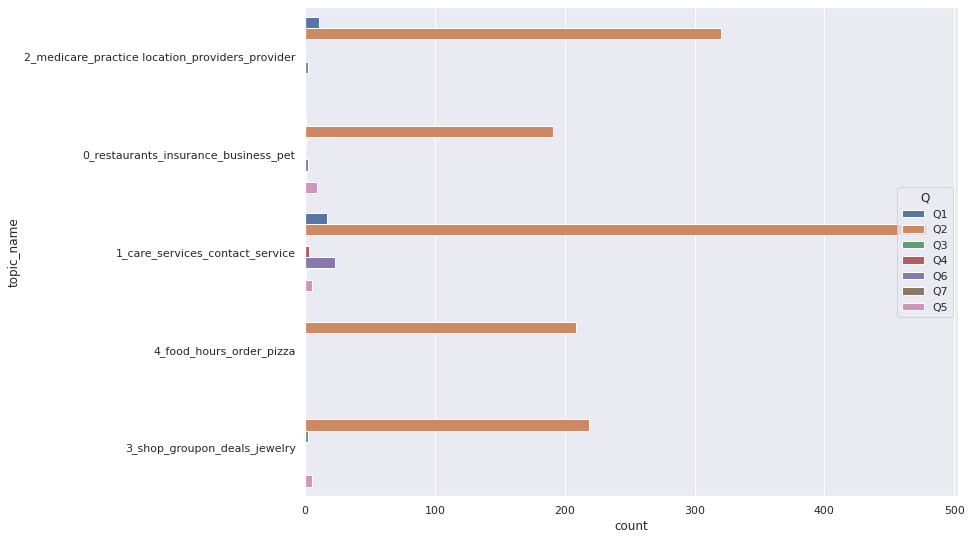

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,9)})

ax = sns.countplot(y="topic_name", hue='Q',data=base_line_df)


# Load Pretrained Model to Get Clusters from new Data

In [3]:
import pandas as pd
from bertopic import BERTopic
import torch

#map_location=torch.device('cpu')

#model = torch.load(,map_location=map_location)


model_path = "/content/drive/MyDrive/finetunded_topic_models/chubb_crf_topic_model/chubb_baseline_topic_clusters.bin"



def load_model(model_path):
    model = BERTopic.load(model_path)
    return model

model = load_model(model_path)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [9]:
result_df  = pd.read_excel('/content/CRF_QA_BASELINE_Q7_Q8.xlsx')
result_df.head()

,Q,Question,id,name,url,text,found_noun,context,context_verb,confidence,Status,Comments
0,Q7,Does the insured/applicant directly gather int...,3ef1f805b398b4f8,EVESTMENT ALLIANCE LLC,https://www.evestment.com/,Media Events . Connect With Us . Quarterly Ins...,['intelligence'],Events . Connect With Us . Quarterly Instituti...,['perform'],0.99,FP,NaN
1,Q7,Does the insured/applicant directly gather int...,30a7a327b3f82468,KLOBOT INCORPORATED,https://www.klobot.ai/,Why KLoBot for Legal . Why KLoBot for Legal . ...,['intelligence'],to help humans design intuitive nocode chatbot...,['perform'],0.93,FP,NaN
2,Q7,Does the insured/applicant directly gather int...,e6d2c736ef55df33,PROTOCOL BUSINESS INTELLIGENCE,https://laintelligence.com/about/,Call Us Today . Retainer Agreement PDF . Meet ...,"['intelligence', 'surveillance']",. Difficult Process Service . Bug Sweeps TSCM ...,['perform'],0.98,TP,NaN
3,Q7,Does the insured/applicant directly gather int...,48c07191b5ddb884,SILVA OTTING AND SILVA LLC,https://www.ua.txstate.edu/about/development-f...,Giving to Texas State University . Board of Tr...,['intelligence'],public policy advocacy firm in April Ancira St...,['gather'],0.98,TP,NaN
4,Q7,Does the insured/applicant directly gather int...,b46b16561269aba3,CUBIC DIMENSION INCORPORATED,https://www.cubic.com/,Rugged IoT Solutions . Fare Collection Revenue...,"['intelligence', 'surveillance']",performancebased training . Cubic provides net...,['perform'],0.99,TP,NaN


In [7]:
topic_model.topic_names

{-1: '-1_shop_deals_jewelry_accessories',
 0: '0_restaurants_insurance_business_pet',
 1: '1_care_services_contact_service',
 2: '2_medicare_practice location_providers_provider',
 3: '3_shop_groupon_deals_jewelry',
 4: '4_food_pizza_menu_st'}

In [10]:
from tqdm import tqdm

topic_dict = topic_model.topic_names
result_df_docs = list(result_df['context']) 

topic_labels = []
topic_names = []
scores = []


# for topic_cluster in topics:
#     topic_name =  topic_dict.get(topic_cluster)
#     topic_labels.append(topic_name)


for doc in tqdm(result_df_docs):
    predictions = topic_model.find_topics(doc)
    topic_cluster = predictions[0][0]
    topic_name = topic_dict.get(topic_cluster)
    confidence_score = predictions[1][0]
    
    topic_labels.append(topic_cluster)
    topic_names.append(topic_name)
    scores.append(confidence_score)


result_df['topic_name'] = topic_names
result_df['topic_cluster'] = topic_labels
result_df['topic_score'] = scores

100%|██████████| 60/60 [00:00<00:00, 66.44it/s]


In [11]:
result_df

,Q,Question,id,name,url,text,found_noun,context,context_verb,confidence,Status,Comments,topic_name,topic_cluster,topic_score
0,Q7,Does the insured/applicant directly gather int...,3ef1f805b398b4f8,EVESTMENT ALLIANCE LLC,https://www.evestment.com/,Media Events . Connect With Us . Quarterly Ins...,['intelligence'],Events . Connect With Us . Quarterly Instituti...,['perform'],0.99,FP,NaN,1_care_services_contact_service,1,0.287813
1,Q7,Does the insured/applicant directly gather int...,30a7a327b3f82468,KLOBOT INCORPORATED,https://www.klobot.ai/,Why KLoBot for Legal . Why KLoBot for Legal . ...,['intelligence'],to help humans design intuitive nocode chatbot...,['perform'],0.93,FP,NaN,3_shop_groupon_deals_jewelry,3,0.167275
2,Q7,Does the insured/applicant directly gather int...,e6d2c736ef55df33,PROTOCOL BUSINESS INTELLIGENCE,https://laintelligence.com/about/,Call Us Today . Retainer Agreement PDF . Meet ...,"['intelligence', 'surveillance']",. Difficult Process Service . Bug Sweeps TSCM ...,['perform'],0.98,TP,NaN,1_care_services_contact_service,1,0.337021
3,Q7,Does the insured/applicant directly gather int...,48c07191b5ddb884,SILVA OTTING AND SILVA LLC,https://www.ua.txstate.edu/about/development-f...,Giving to Texas State University . Board of Tr...,['intelligence'],public policy advocacy firm in April Ancira St...,['gather'],0.98,TP,NaN,1_care_services_contact_service,1,0.320034
4,Q7,Does the insured/applicant directly gather int...,b46b16561269aba3,CUBIC DIMENSION INCORPORATED,https://www.cubic.com/,Rugged IoT Solutions . Fare Collection Revenue...,"['intelligence', 'surveillance']",performancebased training . Cubic provides net...,['perform'],0.99,TP,NaN,1_care_services_contact_service,1,0.196047
5,Q7,Does the insured/applicant directly gather int...,5c4edd6635ed647a,VIDEO CENTRO,https://www.centro.net/,Collaboration Messaging . Universal Reporting ...,['intelligence'],across teams . Your Business Thrives with Basi...,['perform'],0.99,FP,NaN,0_restaurants_insurance_business_pet,0,0.248589
6,Q7,Does the insured/applicant directly gather int...,396ea4ad13ada7d3,SDSA INVESTMENTS LLC,https://ferncliffinvestments.com/,CECL Consulting Valuation . Loan Sale Advisory...,['surveillance'],Consulting Valuation . Loan Sale Advisory . Th...,['perform'],0.98,TP,NaN,1_care_services_contact_service,1,0.277385
7,Q7,Does the insured/applicant directly gather int...,40c450c2250548d4,SPL INTEGRATED SOLUTIONS,https://www.leonardodrs.com/locations/,In the Community . Avionics and Aviation Suppo...,"['intelligence', 'surveillance']",and Aviation Support . Communications and Netw...,['perform'],0.98,FP,NaN,1_care_services_contact_service,1,0.276156
8,Q7,Does the insured/applicant directly gather int...,d6c82d94a62c8ad6,E K B OPERATIONS LLC,https://www.cdkglobal.com/us/cdk-locations,It takes harmony between all your departments ...,['intelligence'],Order . Sales Inventory . CDK Data Services Bu...,['perform'],0.98,FP,NaN,1_care_services_contact_service,1,0.184364
9,Q7,Does the insured/applicant directly gather int...,0a59e8a75c873213,DESCARTES SUPPORT,https://www.descartes.com/home,Login Register . B2B Connectivity and Messagin...,['intelligence'],Screening . Other Government Industry Programs...,['perform'],0.99,FP,NaN,1_care_services_contact_service,1,0.298303


In [12]:
result_df.to_csv('CRF_QA_BASELINE_Q7_Q8_topics.csv',index=False)